HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. 
The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. 
The aim of these programs is to increase the effectiveness of their employees. 
But where HR Analytics fit in this? and is it just about improving the performance of employees?

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? 
We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 
import scipy as stats


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/tsarika16/Data-Trained/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


The dataset contains the details of the employees who are working in an organization. 

The dataset contains both dependent and independent varaibles and also contains both categorical and numerical data.

In this dataset "Attrition" is our target variable which has two classes.

So this is a"Classification type" problem in which we need to increase the attrition of the employees.

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis(EDA)

In [4]:
# checking shape of dataset
df.shape

(1470, 35)

In [5]:
#reading all column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#checking data types of each feature
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Checking unique values in each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

These are the number of unique values present in each columns.

Since the columnsEmployeeCount,over18 and StandardHours have only 1 count so they can be dropped since they won't affect our model. Also EmployeeNumber is taken on the basis of unique ID of the employees which does not helps so we can drop this too.

In [9]:
# Dropping irrelevant columns
df.drop(columns=["EmployeeCount","Over18","StandardHours","EmployeeNumber"], axis=1, inplace=True)

In [10]:
df.shape

(1470, 31)

In [11]:
# checking null values in the dataframe
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

There is no missing values present in the dataset.

<AxesSubplot:>

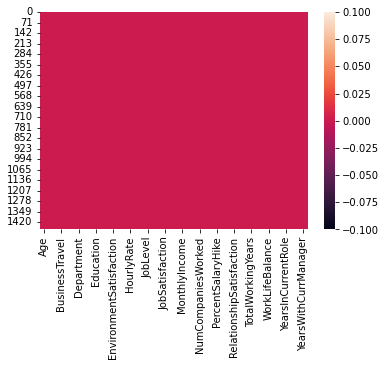

In [12]:
# lets visualize the null values clearly
sns.heatmap(df.isnull())

After Visualizing their is no missing values

In [13]:
# checking the uniqueness of dataset
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

There are two unique values in the label 'yes' or 'no' .  

Yes means the employees is facing attrition and 
No means employees are not facing any attrition.

In [14]:
# checcking count of number of employees who stayed and left the company
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

237 employees are facing attrition and 1233 are not facing attrition.

In [15]:
# checking whether the dataset contains any space
df.loc[df['Attrition']==" "]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


It seems that there are no spaces in the dataset.

In [16]:
# describing the dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


This gives the statistical information of the dataset.

From the above description we can observe the followings things:

The counts of all the columns are same whch means there are no missing values present in the data.

The mean is more than the median(50%) in most of the columns which means they are skewed to right. the min age of the employee is 18 and max is 60 and most of the employees are in between 36.

In few columns the median (50%) is more thean the mean which means they are skewes to left.

By summarising the data above we can infer that Dailyrate has a huge outliers from the maximum of 1499 which is quite far from the 75%percentile.These differences we can also be seen in age,distancefromhome,hourlyrate,monthlyincome,totalworkingyears,year satcompany and many other.

Some of the colums have huge difference in mean and the standard deviation.

Lets separate categorical and numerical columns

In [17]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


These are the categorical columns present in the dataset.

In [18]:
# now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


These are the numerical columns present in the dataset.

# Data Visualization

## Univariate Analysis

## Plotting categorical columns

No     1233
Yes     237
Name: Attrition, dtype: int64


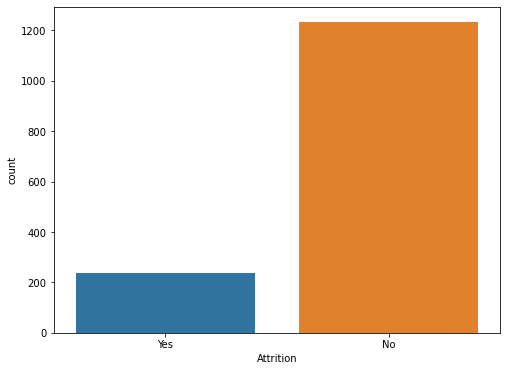

In [19]:
# visualizing the number of employees who stayed and left the company
print(df["Attrition"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["Attrition"])
plt.show()

In these there are few employees facing attrition and data is highly imbalanced.

We will have to balance the data using either oversamppling or undersampling method before building the model.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


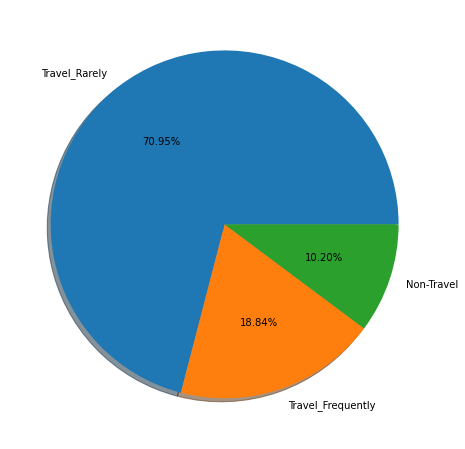

In [20]:
# visualize the count of employeess on the basis of BusinessTravel
print(df["BusinessTravel"].value_counts())
labels='Travel_Rarely','Travel_Frequently','Non-Travel'
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(df['BusinessTravel'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The pie plot shows most of the employees travel rarely and few employees travel frequently.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


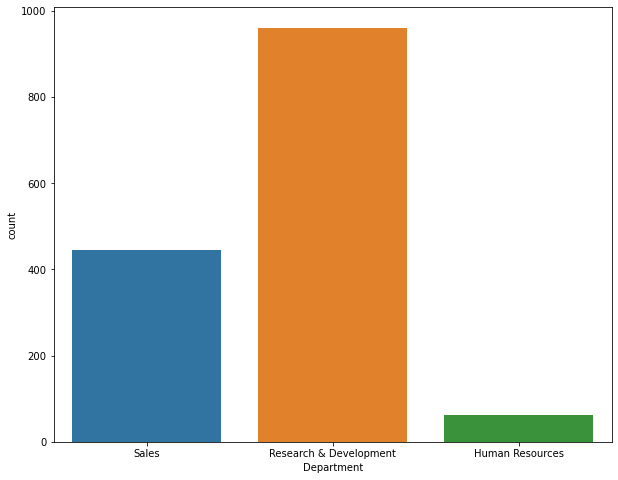

In [21]:
# visualizing count of department where the employees are working
print(df["Department"].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(df["Department"])
plt.show()

Most of the employees belongs to Research&Development department and 446 are working in the Sales department and remaining 63 employees works in HR department.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


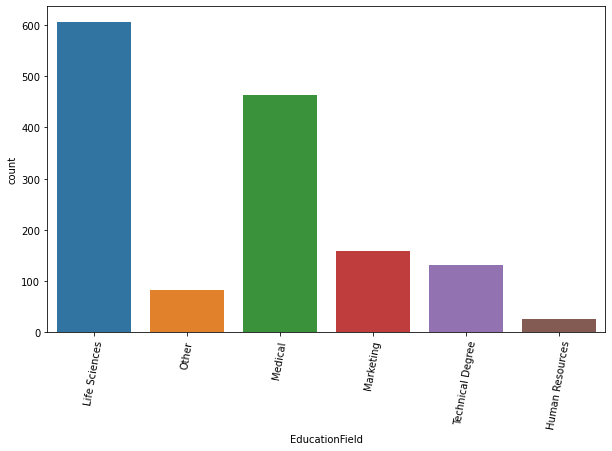

In [22]:
# visualizing count of Educational field of the empoyees
print(df["EducationField"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df["EducationField"])
plt.xticks(rotation=80)
plt.show()

Here are most of the employees are from the Life Sciences background by Medical field and only few employees are from human Resources field.

Male      882
Female    588
Name: Gender, dtype: int64


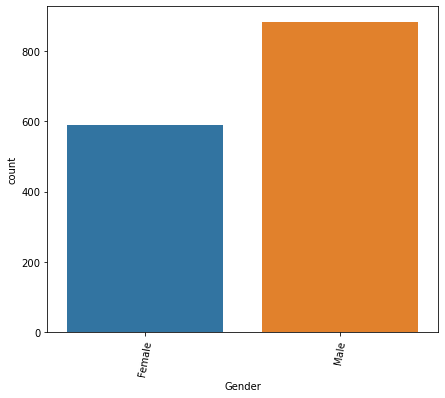

In [23]:
# visualize the countof gender
print(df["Gender"].value_counts())
plt.figure(figsize=(7,6))
sns.countplot(df["Gender"])
plt.xticks(rotation=80)
plt.show()

Male employees are facing the attrition than the Female employees.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


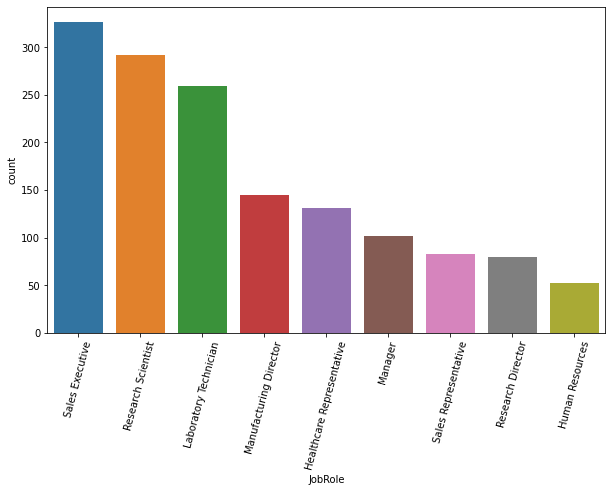

In [24]:
# visualizing count pf jobrole of the employees
print(df["JobRole"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df["JobRole"])
plt.xticks(rotation=75)
plt.show()

Sales Executive jobs are more followed by Research Scientist and Laboratory Technician.Human Resources job roles are very less in numbers.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


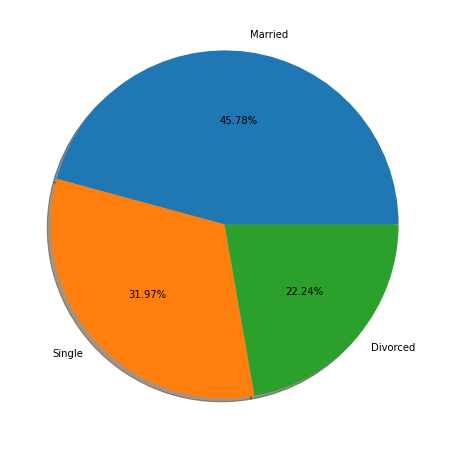

In [25]:
# Visualize the count of marital status of the employees 
print(df["MaritalStatus"].value_counts())
labels='Married','Single','Divorced'
colors = ["4CAF50","hotpink","b"]
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(df['MaritalStatus'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

There are 46% of employees who are married, nearer to 32% are single remaining 22% are divorced. so count of married employees are more in the company.

No     1054
Yes     416
Name: OverTime, dtype: int64


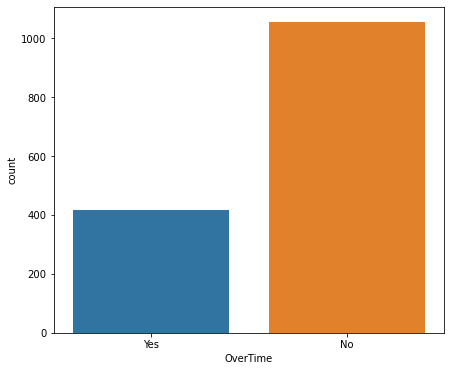

In [26]:
#visualizing  count of overtime of the employees
print(df["OverTime"].value_counts())
plt.figure(figsize=(7,6))
sns.countplot(df["OverTime"])
plt.show()

1054 employees who are working with in the given time and only 416 employees work more than the assigned time.

# Distribution of Skewness

## Plotting numerical columns

In [27]:
numerical_columns=['Age','DailyRate','DistanceFromHome','Education','Environment','']

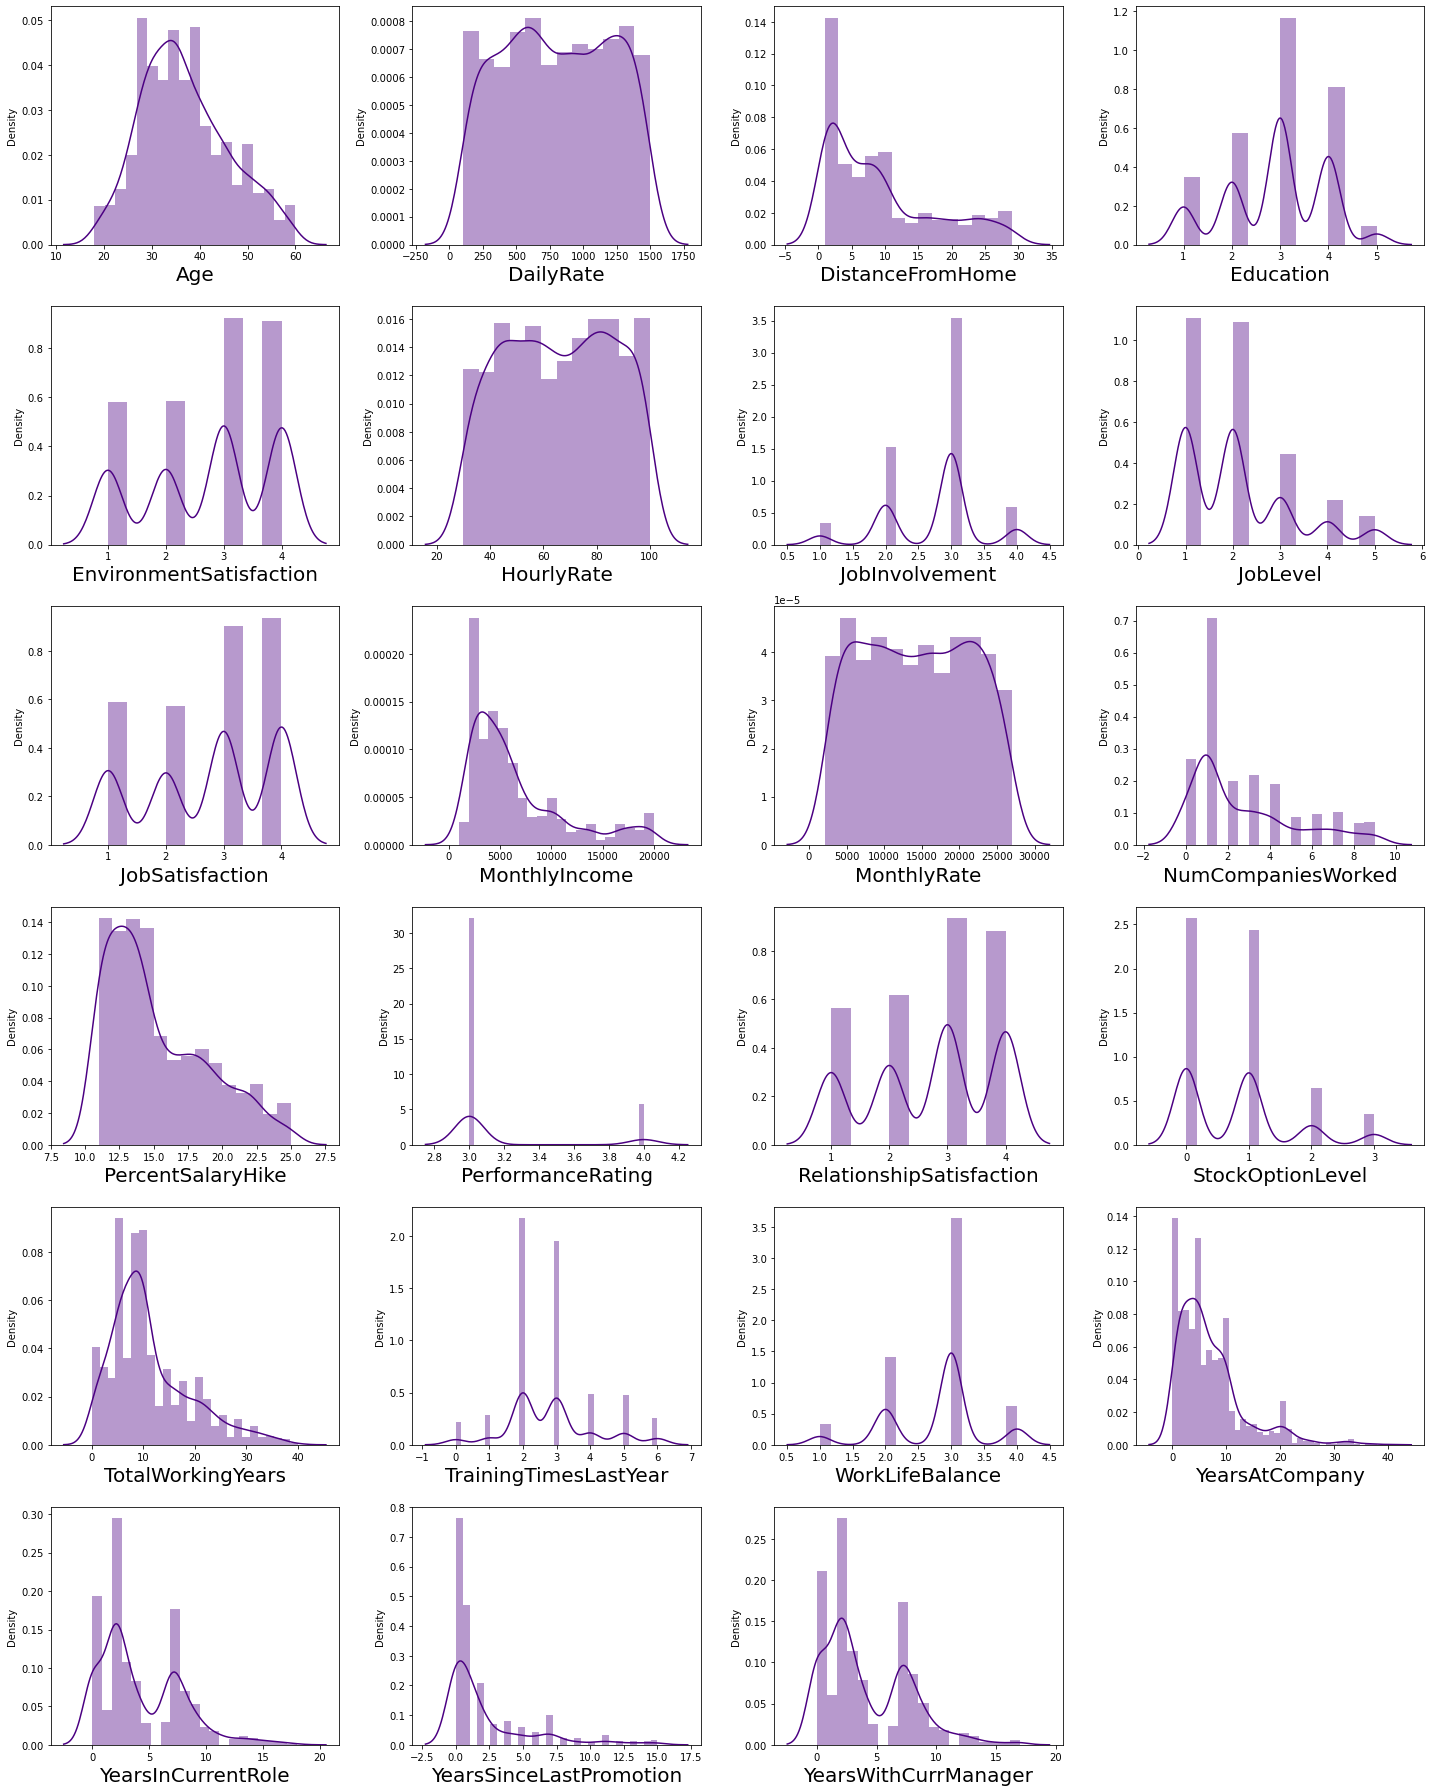

In [28]:
# checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Except Age,DailyRate,HourlyRate and MonthlyRate all the other columns in numerical_columns list are skewed.

## Bivariate Analysis:

Text(0.5, 1.0, 'Comparsion between Attrition and Age')

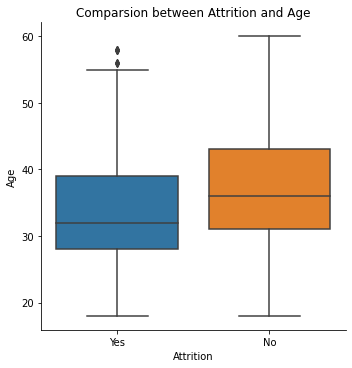

In [29]:
# visualizing the age of the employees who left and stayed
sns.catplot(x='Attrition',y='Age',data=df, kind="box",size=5)
plt.title("Comparsion between Attrition and Age")

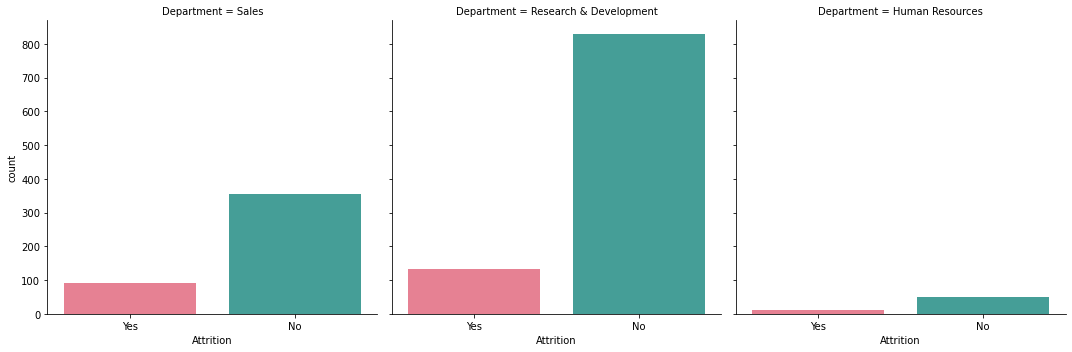

In [30]:
# Department
sns.catplot(x='Attrition',col='Department',data=df,kind='count',palette="husl")

Focusing on departmentwise we can observe from the above graph that about 80% of employees in HR department dont want to leave the organization and only 20% employees wants to leave. Similarily the attrition levels are not appreciable in Research and Development followed by Sales.

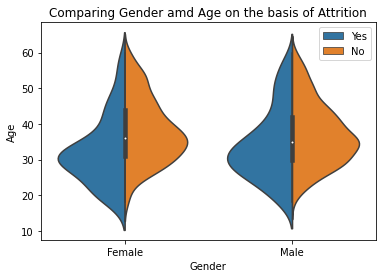

In [31]:
#checking how the attrition pays role in gender and age
sns.violinplot(x=df['Gender'],y=df['Age'],hue=df["Attrition"],split=True)
plt.title("Comparing Gender amd Age on the basis of Attrition")
plt.legend()
plt.show()

We can notice the female employees of age 30-40 dont want to leave the organization but few only feale employees of age 30 wants to leave the organization.Even the male employees of age 25-40 dont want to leave the company(organization).

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


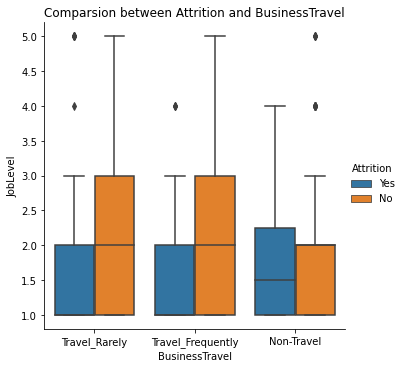

In [32]:
# BusinessTravel
print(df["BusinessTravel"].value_counts())
sns.catplot(x="BusinessTravel",y='JobLevel',data=df,hue="Attrition",kind="box")
plt.title("Comparsion between Attrition and BusinessTravel")
plt.show()

The employees in joblevel 5 who travel rarely are dont want to leave the organization and the employees in the job level 4 with non business travel are facing attrition.

## EducationField

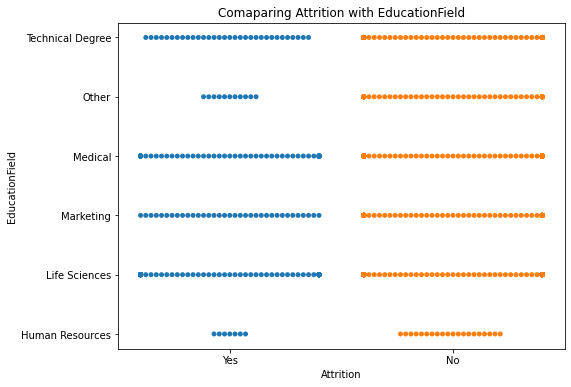

In [33]:
# Checking how the attrition perform according to the employees EducationField
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with EducationField")
sns.swarmplot(x=df['Attrition'],y=df['EducationField'],data=df)
plt.show()

Most of the employees are from Life Sciences background followed by Marketing and Medical. Only few employees in the HR and Other education level have left the company and most of the people stayed still. Also the employees in the highest level of education left the company.

## MaritalSatus

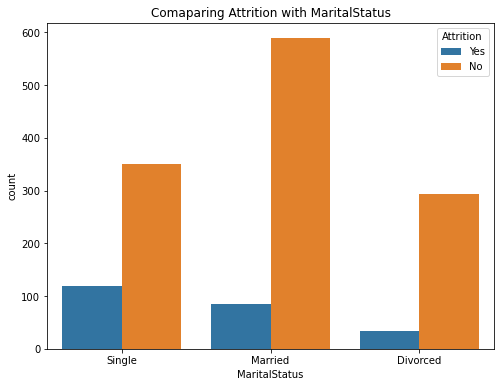

In [34]:
# Checking how the attrition perform according to the employees Maritalstatus
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with MaritalStatus")
sns.countplot(x=df['MaritalStatus'],hue=df["Attrition"],data=df)
plt.show()

The attrition rate is high in singles followed by Married employees. it is understood that irrespective of the marital status,there are large people who stay with the company and do not leave.Therefore,marital status is weak predictor of attrition.

## Job Role

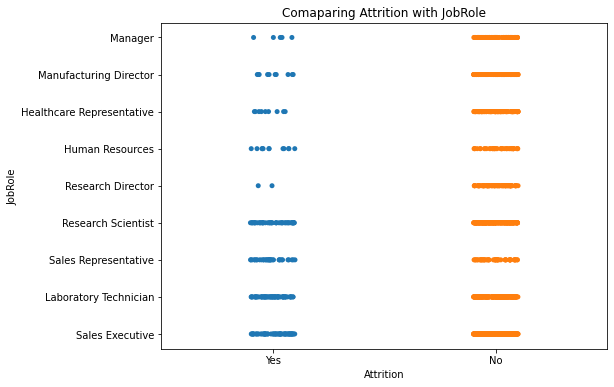

In [35]:
# Checking how the attrition perform according to the employees jobrole
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with JobRole")
sns.stripplot(x=df['Attrition'],y=df['JobRole'])
plt.show()

Most of the employees in joblevel 4 have high percent of "No" attrition and very less percent for attrition "Yes". Which means most of the employees don't want to leave the company.

## DailyRate and HourlyRate, MonthlyRate and MonthlyIncome

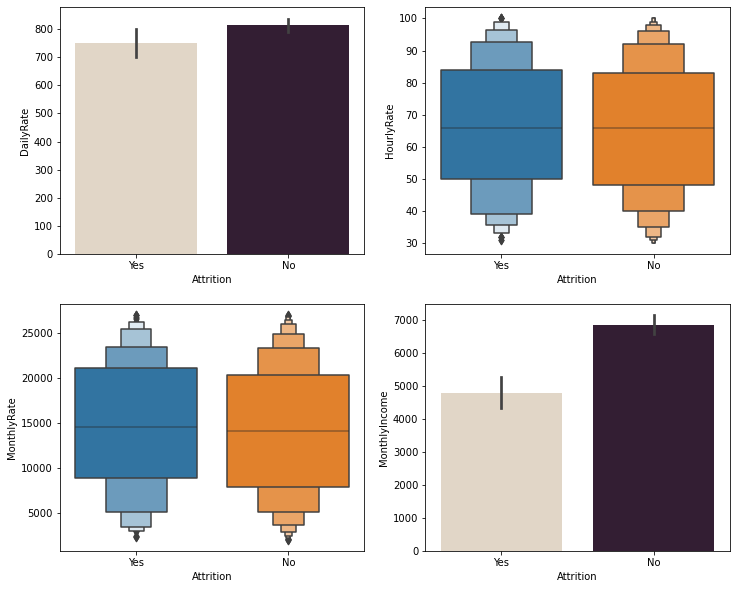

In [36]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking attrition level in Dailyrate
sns.barplot(x='Attrition',y='DailyRate',ax=axes[0,0],data=df,palette="ch:.25")

# Checking attrition level in hourlyrate
sns.boxenplot(x='Attrition',y='HourlyRate',ax=axes[0,1],data=df)

# Checking attrition level in Monthlyrate
sns.boxenplot(x='Attrition',y='MonthlyRate',ax=axes[1,0],data=df)

# Checking attrition level in Monthlyincome
sns.barplot(x='Attrition',y='MonthlyIncome',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

From the above barplots we can infer the following conclusions.

First plot shows that the Employees working with lower daily rate wants to leave the organization compared to employees working with higher dailyrate.

In the second plot both Attrition and HourlyRate equal which means there is no significant difference in attrition and hourlyrate, so hourlyrate wont affect the attrition.

Third plot shows the MonthlyRate for "Yes" is bit higher than "No" attrition.

The fourth plot, the MonthlyIncome for "No" attrition is quite high than the "Yes" attrition and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.

## Education

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


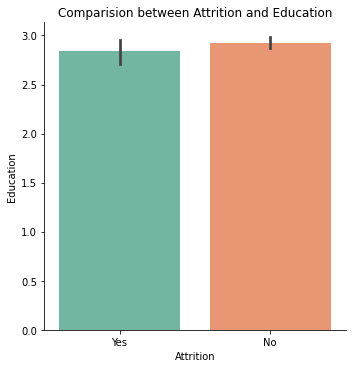

In [37]:
#Checking how attrition effects the education of employees 
print(df["Education"].value_counts())
sns.catplot(x='Attrition',y='Education',data=df, kind="bar",palette="Set2")
plt.title("Comparision between Attrition and Education")
plt.show()

## EnvironmentSatisfaction, JobInvolvement, JobSatisfaction and RelationshipSatisfaction

In [38]:
# Checking the counts of EnvironmentSatisfaction
print(df["EnvironmentSatisfaction"].value_counts())

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


In [39]:
# Checking the counts of JobInvolvement
print(df["JobInvolvement"].value_counts())

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


In [40]:
# Checking the counts of JobSatisfaction
print(df["JobSatisfaction"].value_counts())

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


In [41]:
# Checking the counts of JobSatisfaction
print(df["JobSatisfaction"].value_counts())

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


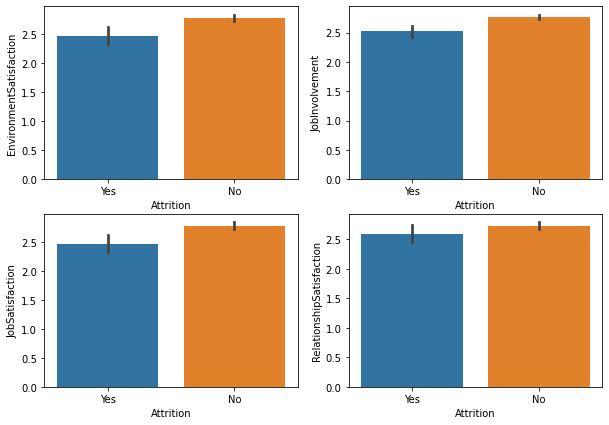

In [42]:
fig,axes=plt.subplots(2,2,figsize=(10,7))

# Checking attrition level in employees EnvironmentSatisfaction
sns.barplot(x='Attrition',y='EnvironmentSatisfaction',ax=axes[0,0],data=df)

# Checking attrition level in JobInvolvement
sns.barplot(x='Attrition',y='JobInvolvement',ax=axes[0,1],data=df)

# Checking attrition level in JobSatisfaction
sns.barplot(x='Attrition',y='JobSatisfaction',ax=axes[1,0],data=df)

# Checking attrition level in RelationshipSatisfaction
sns.barplot(x='Attrition',y='RelationshipSatisfaction',ax=axes[1,1],data=df)
plt.show()

# Observation:

We can notice that the relative percent of "No" attrition in employees with high EnvironmentSatisfaction in the above plot. Which means the employees having low EnvironmentSatisfaction wants to leave the company.

From the graph we can notice that the employees in low Jobinvolvement levels wants to leave the organization.

The JobSatisfaction of employees for "Yes" attrition is less, it is obvious that the employees with low JobSatisfaction wants to leave the organization.

The employees having high RelationshipSatisfaction are facing the attrition.

## WorkLifeBalance

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


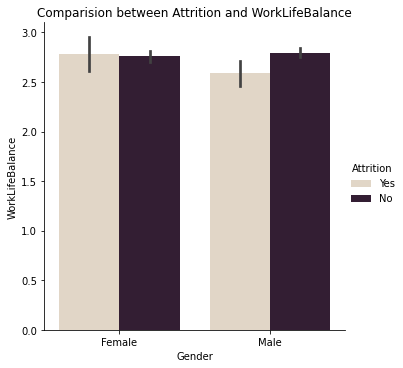

In [43]:
# Checking attrition level in WorkLifeBalance
print(df["WorkLifeBalance"].value_counts())
sns.catplot(x='Gender',y='WorkLifeBalance',data=df,kind="bar",hue='Attrition',palette="ch:.25")
plt.title("Comparision between Attrition and WorkLifeBalance")
plt.show()

The female employees with bad WorkLifeBalance facing more attrition compare to male employees. There are more employees in WorkLifeBalance level 2 and 3.

## YearsAtCompany, TotalWorkingYears, YearsInCurrentRole and YearsSinceLastPromotion

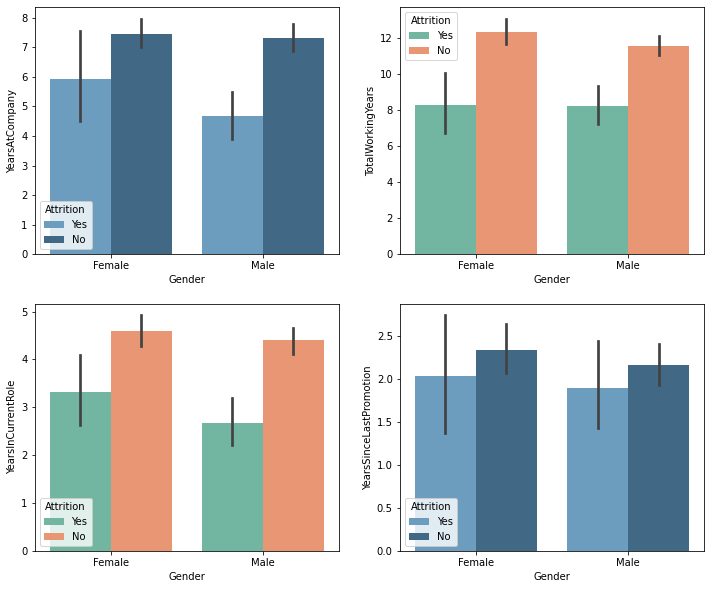

In [44]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking attrition level in YearsAtCompany
sns.barplot(x='Gender',y='YearsAtCompany',ax=axes[0,0],data=df,hue='Attrition',palette="Blues_d")

# Checking attrition level in TotalWorkingYears
sns.barplot(x='Gender',y='TotalWorkingYears',ax=axes[0,1],data=df,hue='Attrition',palette="Set2")

# Checking attrition level in YearsInCurrentRole
sns.barplot(x='Gender',y='YearsInCurrentRole',ax=axes[1,0],data=df,hue='Attrition',palette="Set2")

# Checking attrition level in YearsSinceLastPromotion
sns.barplot(x='Gender',y='YearsSinceLastPromotion',ax=axes[1,1],data=df,hue='Attrition',palette="Blues_d")
plt.show()

### Observation:

Female employees are spending more years at company but the "Yes" attrition for female employees are more than male.

As same as above the Total Working Years of female employees is more than the male employees and the "Yes" attrition for male and female employees are same.

Here also the female employees spending more years in the current organization compare to male employees and also they are facing attrition.

The female employees spend more years since their last promotion than male.

From the above observation we can say that the spending years of female employees is more than male and the wants to quit the organization.

## PerformanceRating

3    1244
4     226
Name: PerformanceRating, dtype: int64


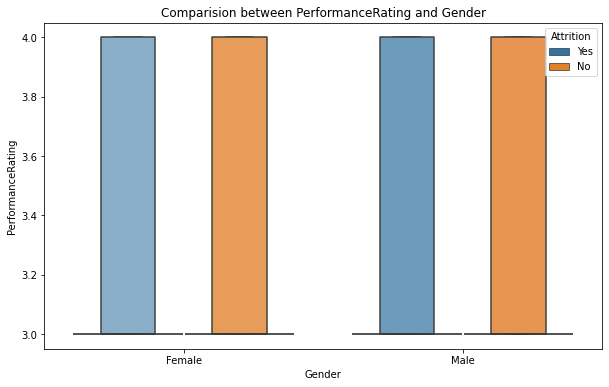

In [45]:
# Let's check how the performance rating afecting the attrition level
print(df["PerformanceRating"].value_counts())
plt.figure(figsize=(10,6))
sns.boxenplot(df['Gender'],df['PerformanceRating'],data=df,hue=df['Attrition'])
plt.title("Comparision between PerformanceRating and Gender")
plt.show()

## PercentSalaryHike

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


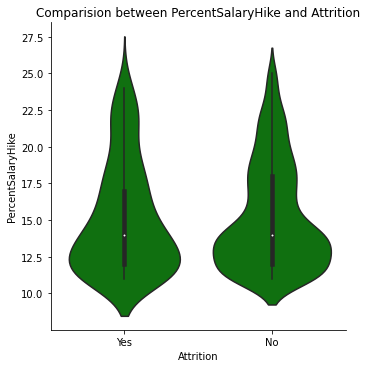

In [46]:
# Let's check how the attrition afecting the PercentSalaryHike level
print(df["PercentSalaryHike"].value_counts())
sns.catplot(x="Attrition", y="PercentSalaryHike", kind="violin",color="g", data=df)
plt.title("Comparision between PercentSalaryHike and Attrition")
plt.show()

There is no much difference in Attrition and PercentSalaryHike, they both are seems to be equal, means the PercentSalaryHike wont affect the attrition.

## PerformanceRating, TrainingTimeLastYear and NumCompWorked

In [47]:
# Checking the count of the column
print(df["TrainingTimesLastYear"].value_counts())

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


In [48]:
# Checking the count of the column
print(df["PerformanceRating"].value_counts())

3    1244
4     226
Name: PerformanceRating, dtype: int64


In [49]:
# Checking the count of the column
print(df["NumCompaniesWorked"].value_counts())

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


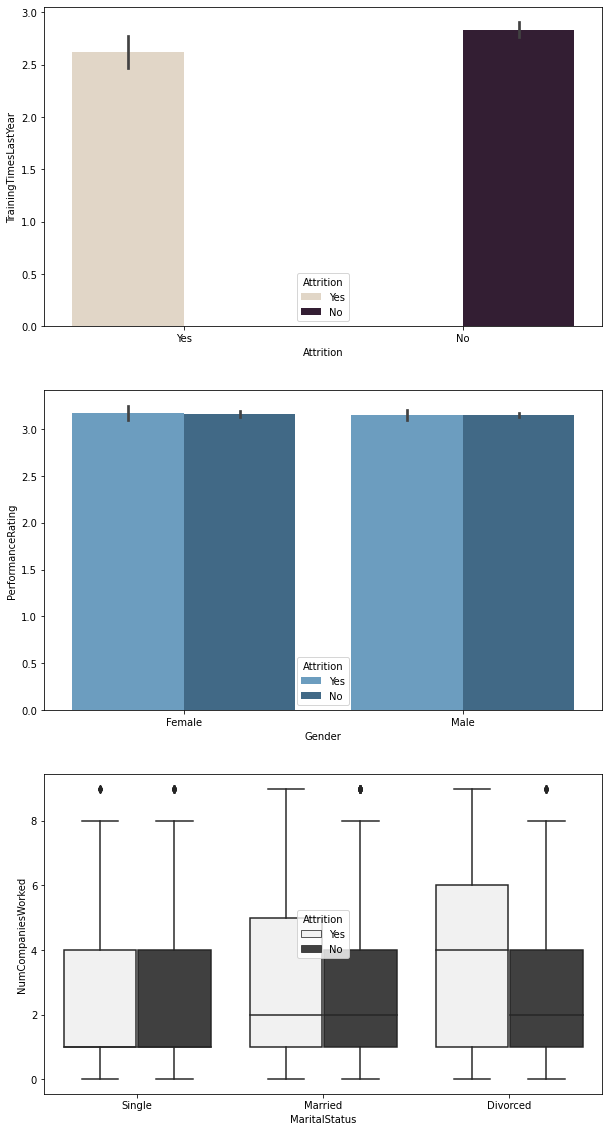

In [50]:
fig,axes=plt.subplots(3,1,figsize=(10,20))

# Checking attrition level in TrainingTimesLastYear
sns.barplot(x='Attrition',y='TrainingTimesLastYear',ax=axes[0],data=df,hue='Attrition',palette="ch:.25")

# Checking attrition level in PerformanceRating
sns.barplot(x='Gender',y='PerformanceRating',ax=axes[1],data=df,hue='Attrition',palette="Blues_d")

# Checking attrition level in NumCompaniesWorked
sns.boxplot(x='MaritalStatus',y='NumCompaniesWorked',ax=axes[2],data=df,hue='Attrition',color=".25")
plt.show()

### Observations:

**We can notice that the relative percent of "No" attrition in employees with high TrainingTimesLastYear in the above plot which means the employees having low TrainingTimeLastYear wants to leave the company.

**The attrition level for PerformanceRating of both female and male employees are equal.

**Married and divorced employees who worked in more number of companies faced high attrition and the employees who are singles have equal attrtion.

## Years WithCurrent Manager

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64


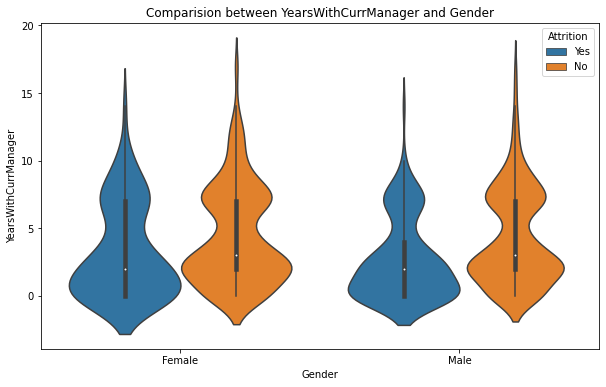

In [51]:
# Let's check how the performance rating afecting the attrition level
print(df["YearsWithCurrManager"].value_counts())
plt.figure(figsize=(10,6))
sns.violinplot(df['Gender'],df['YearsWithCurrManager'],data=df,hue=df['Attrition'])
plt.title("Comparision between YearsWithCurrManager and Gender")
plt.show()

## Multivariate Analysis

In [52]:
# Checking the pairwise relation in the dataset.
#sns.pairplot(df,hue="Attrition")

## Identifying the outliers

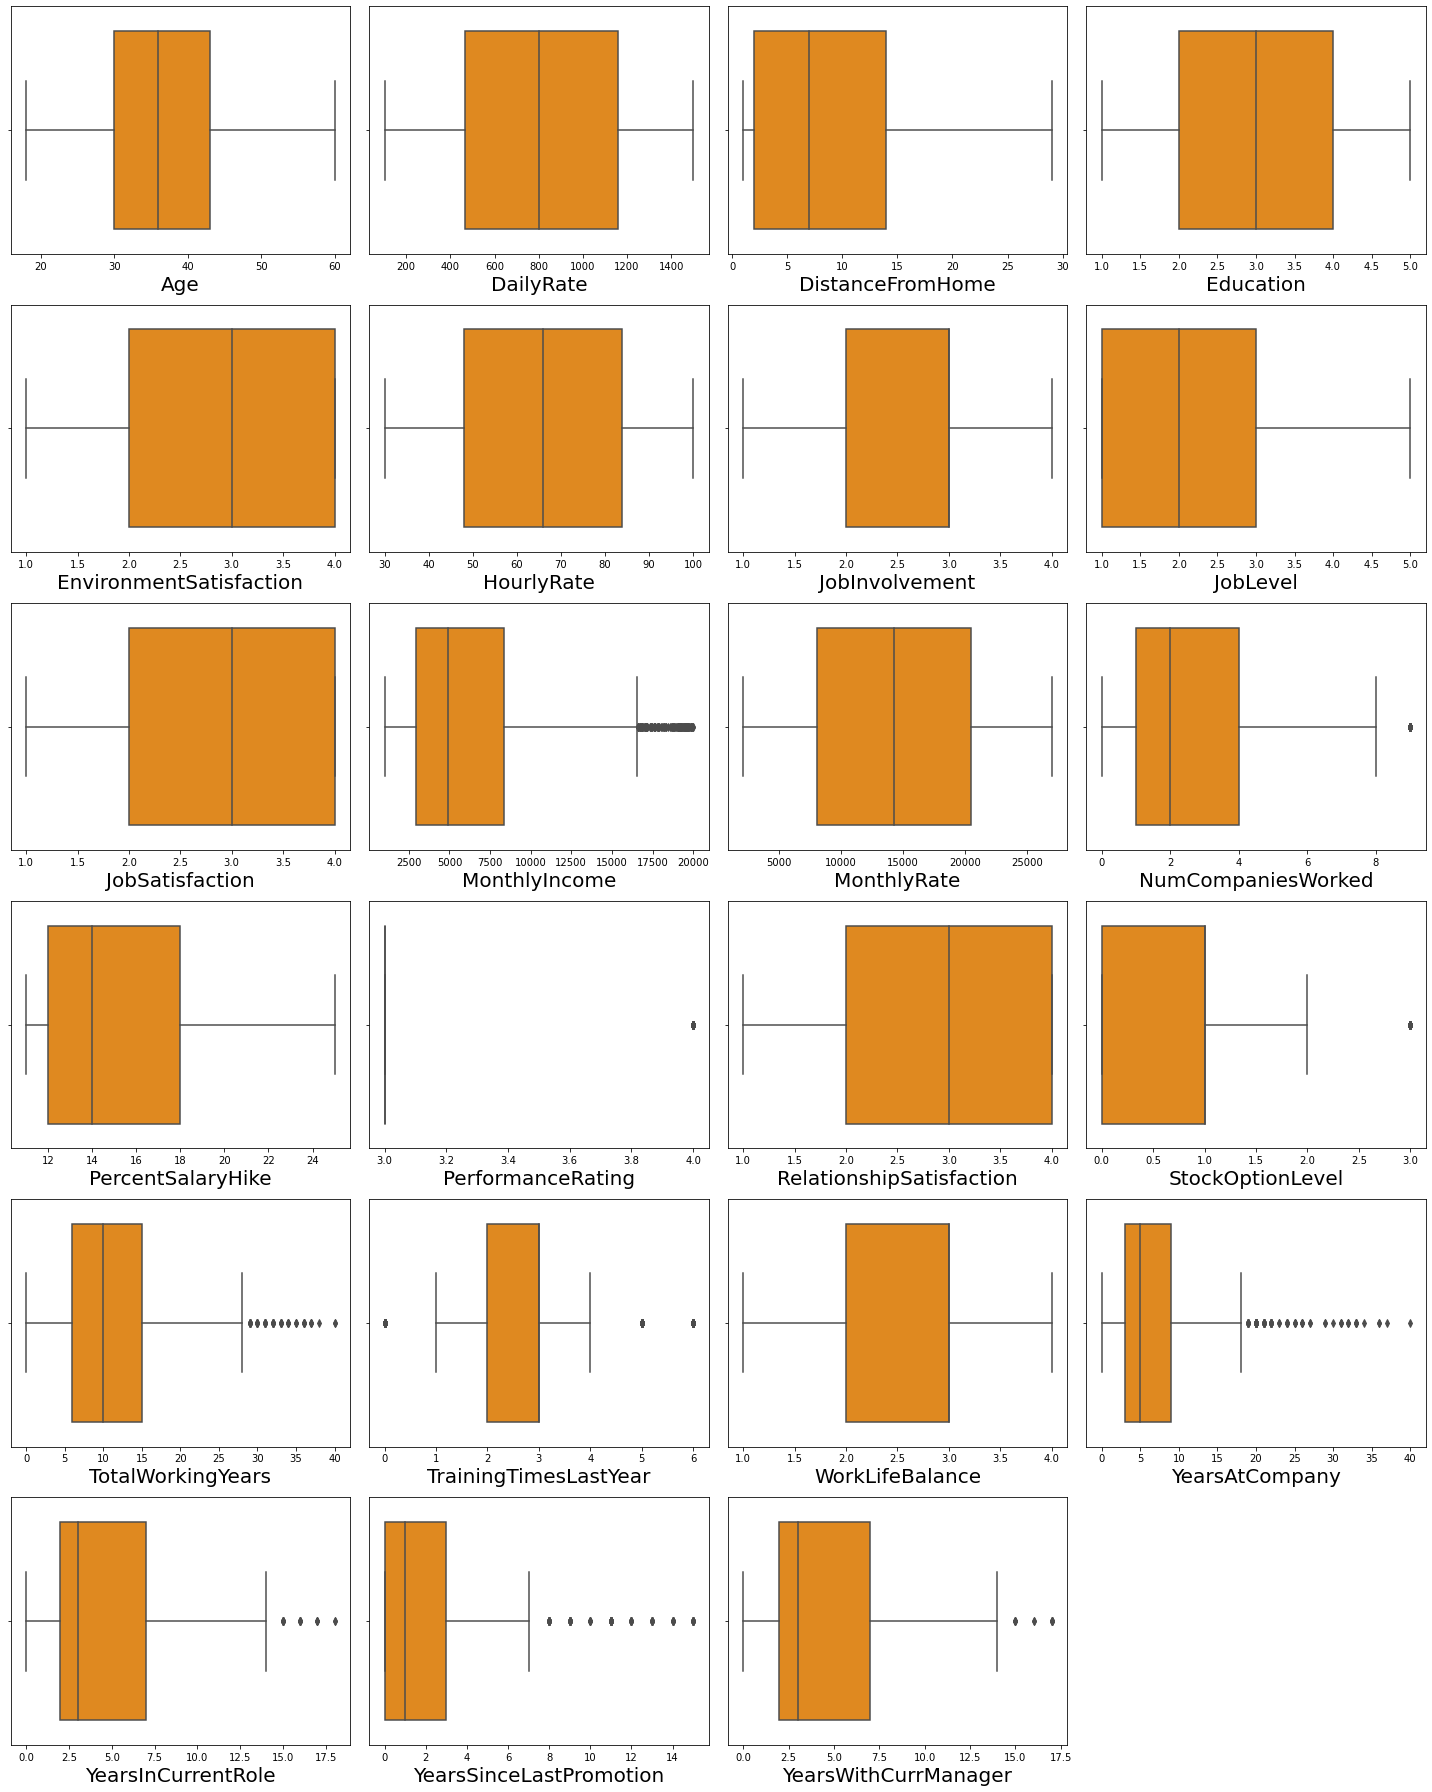

In [53]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers present in the columns MonthlyIncome, NumCompaniesWorked, performanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager. We will remove these outliers using either Zscore or IQR mathod in the further steps.

### Removing outliers

In [54]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [55]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## 1. Zscore method

In [56]:
# Features containing outliers
features = df[['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [57]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,MonthlyIncome,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.108350,2.125136,0.426230,0.932014,0.421642,2.171982,0.164613,0.063296,0.679146,0.245834
1,0.291719,0.678049,2.346151,0.241988,0.164511,0.155707,0.488508,0.764998,0.368715,0.806541
2,0.937654,1.324226,0.426230,0.932014,0.550208,0.155707,1.144294,1.167687,0.679146,1.155935
3,0.763634,0.678049,0.426230,0.932014,0.421642,0.155707,0.161947,0.764998,0.252146,1.155935
4,0.644858,2.525591,0.426230,0.241988,0.678774,0.155707,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...
1465,0.835451,0.523316,0.426230,0.241988,0.735447,0.155707,0.327893,0.615492,0.679146,0.314873
1466,0.741140,0.523316,0.426230,0.241988,0.293077,1.707500,0.001333,0.764998,0.368715,0.806541
1467,0.076690,0.678049,2.346151,0.241988,0.678774,2.171982,0.164613,0.615492,0.679146,0.314873
1468,0.236474,0.277594,0.426230,0.932014,0.735447,0.155707,0.325228,0.488900,0.679146,1.086895


In [58]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [59]:
# Shape of original dataset
df.shape

(1470, 31)

In [60]:
# Shape of new dataframe
new_df.shape

(1387, 31)

In [61]:
# Checking the the data loss
data_loss = (1470-1387)/1470*100
data_loss

5.646258503401361

## 2. IQR (Inter Quantile Range) method

In [62]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [63]:
df1.shape

(779, 31)

In [64]:
# Let's check the dataloss
data_loss = (1470-779)/1470*100
data_loss

47.006802721088434

Using IQR method I am losing 47% of data, so considering Zscore method.

## Checking for skewness

In [65]:
# Checking the skewness
new_df.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

The columns containing skewness more than +0.5 and -0.5 are

DistanceFromHome

JobInvolvement

JobLevel

MonthlyIncome

NumCompaniesWorked

PercentSalaryHike

PerformanceRating

StockOptionLevel

TotalWorkingYears

TrainingTimesLastYear

WorkLifeBalance

YearsAtCompany

YearsInCurrentRole

YearsWithCurrManager

Here PerformanceRating and WorkLifeBalane are categorical columns, so no need to remove skewness in these columns.

### Removing skewness using yeo-johnson method

In [66]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [67]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,-1.489968,0.349828,0.386674,1.620671,-1.495549,-1.084263,-0.173231,-2.608524,0.231837,0.290524,0.582177
1,0.244561,0.349828,0.144235,-0.561880,1.690425,0.548653,0.147620,0.217074,0.948319,1.006575,1.018073
2,-1.028366,-1.141761,-1.431153,1.273711,0.193797,-1.084263,-0.351153,0.217074,-2.156089,-1.571814,-1.528426
3,-0.698191,-1.141761,-0.814425,-0.561880,-1.495549,-1.084263,-0.173231,0.217074,0.621429,1.006575,-1.528426
4,-1.028366,-1.141761,-0.504453,1.764103,-0.957525,0.548653,-0.544046,0.217074,-0.933983,-0.390769,-0.347871


In [68]:
# Checking skewness after using yeo=johnson ethod
new_df.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     1.756335
YearsWithCurrManager       -0.070570
dtype: float64

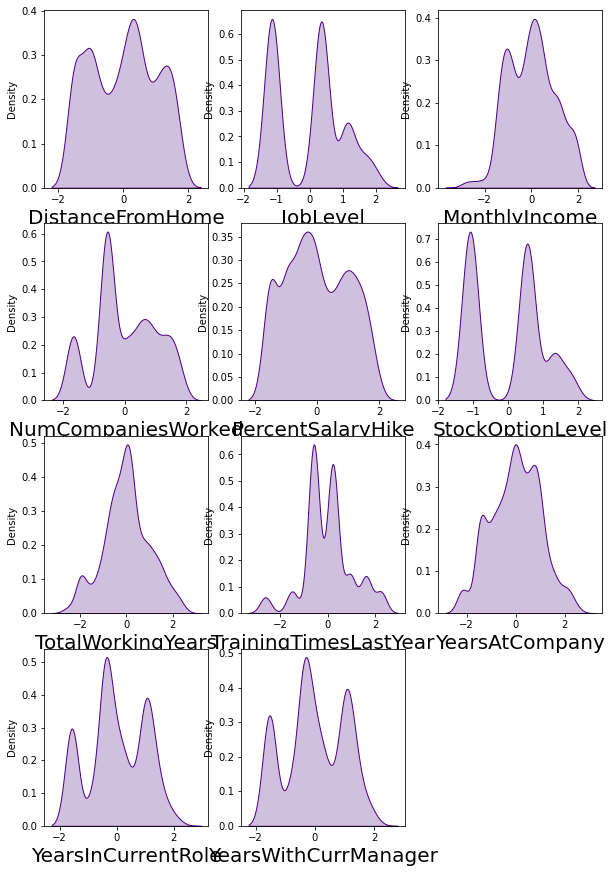

In [69]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The looks normal compare to the old data and the skewness is also reduced. Now our data is cleaned.

### Encoding the categorical columns using Label Encoding

In [70]:
categorical_col = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [71]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [72]:
new_df[categorical_col]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


### Correlation between the target variable and independent variables using HEAT map

In [73]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.028793,0.198502,-0.032676,0.014098,-0.039430,...,-0.000617,0.041744,0.077833,0.634884,-0.013707,-0.016913,0.174149,0.118454,0.103632,0.114962
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.080979,-0.032703,0.023585,-0.112393,0.036252,...,0.010781,-0.052344,-0.175081,-0.220878,-0.059071,-0.062492,-0.201954,-0.187047,-0.029263,-0.186821
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.015034,-0.010560,0.022576,0.001183,-0.025364,...,-0.018274,-0.029660,-0.012732,0.031888,0.011688,-0.014140,-0.021107,-0.032472,-0.027283,-0.033222
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.003967,-0.018442,0.040645,0.033123,-0.005242,...,0.000574,0.004516,0.047773,0.043307,0.006581,-0.044266,0.005806,0.020542,-0.043870,0.007098
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.037660,0.012846,0.013432,-0.014540,-0.030618,...,-0.039364,-0.037705,-0.001271,-0.007789,0.039412,0.026978,0.026334,0.057983,0.048931,0.023995
DistanceFromHome,-0.028793,0.080979,-0.015034,-0.003967,0.037660,1.000000,0.003595,0.011891,-0.012075,0.010557,...,0.013212,0.010099,0.027082,-0.012129,-0.015334,-0.027681,0.006570,0.013091,-0.003226,-0.002310
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.003595,1.000000,-0.038017,-0.026223,-0.019166,...,-0.023487,-0.002393,0.026805,0.152263,-0.023484,0.007844,0.038266,0.050563,0.042517,0.026340
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.011891,-0.038017,1.000000,0.047924,0.010676,...,-0.003621,-0.013734,-0.017331,-0.008101,0.048844,0.034038,0.002739,0.002909,0.034094,0.025918
EnvironmentSatisfaction,0.014098,-0.112393,0.001183,0.033123,-0.014540,-0.012075,-0.026223,0.047924,1.000000,-0.015715,...,-0.025299,0.018414,0.025227,-0.014091,-0.016757,0.032492,0.014305,0.031007,0.027943,0.007643
Gender,-0.039430,0.036252,-0.025364,-0.005242,-0.030618,0.010557,-0.019166,0.010676,-0.015715,1.000000,...,-0.010757,0.041458,0.024390,-0.049776,-0.039213,0.000134,-0.046018,-0.028101,-0.028162,-0.027972


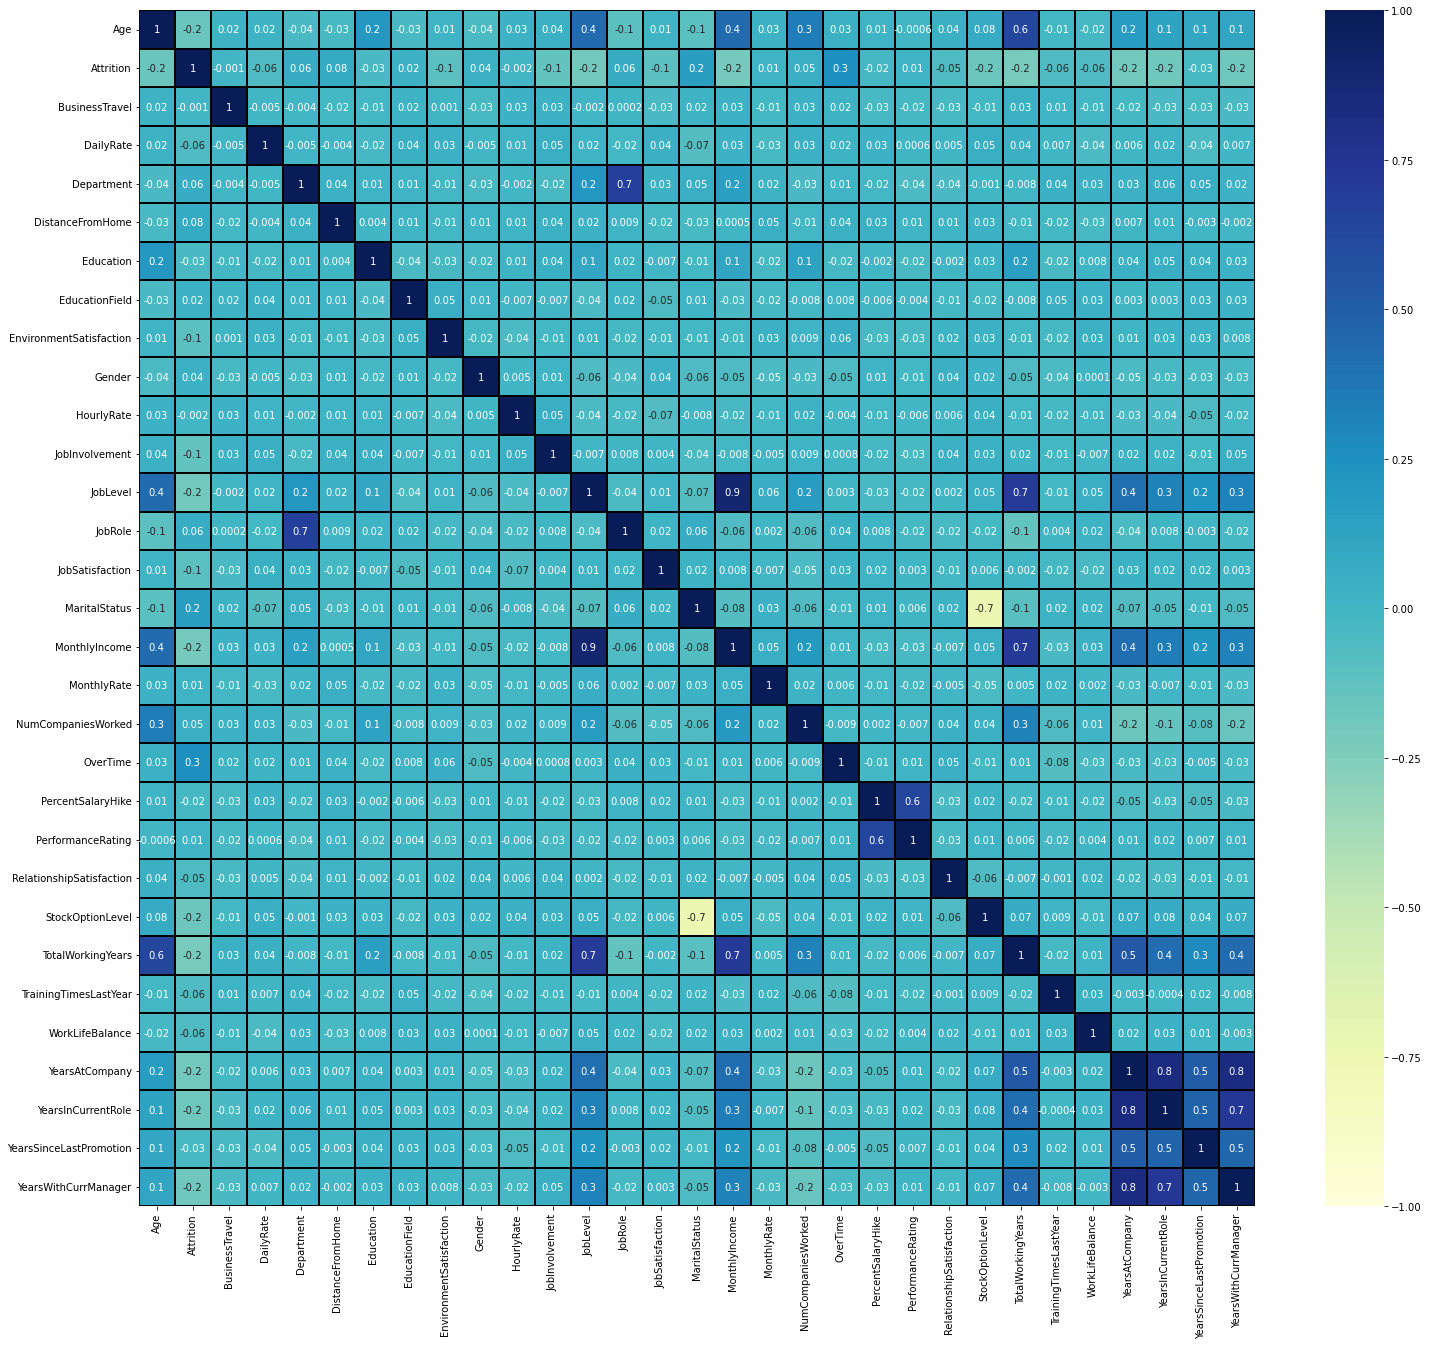

In [74]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [75]:
cor['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.257237
MaritalStatus               0.160960
DistanceFromHome            0.080979
JobRole                     0.064283
Department                  0.063637
NumCompaniesWorked          0.047508
Gender                      0.036252
EducationField              0.023585
MonthlyRate                 0.014888
PerformanceRating           0.010781
BusinessTravel             -0.001041
HourlyRate                 -0.001532
PercentSalaryHike          -0.017523
YearsSinceLastPromotion    -0.029263
Education                  -0.032703
RelationshipSatisfaction   -0.052344
DailyRate                  -0.057220
TrainingTimesLastYear      -0.059071
WorkLifeBalance            -0.062492
EnvironmentSatisfaction    -0.112393
JobSatisfaction            -0.114206
JobInvolvement             -0.133957
Age                        -0.159366
StockOptionLevel           -0.175081
YearsWithCurrManager       -0.186821
YearsInCurrentRole         -0.187047
J

### Visualizing the correlation between label and features using bar plot

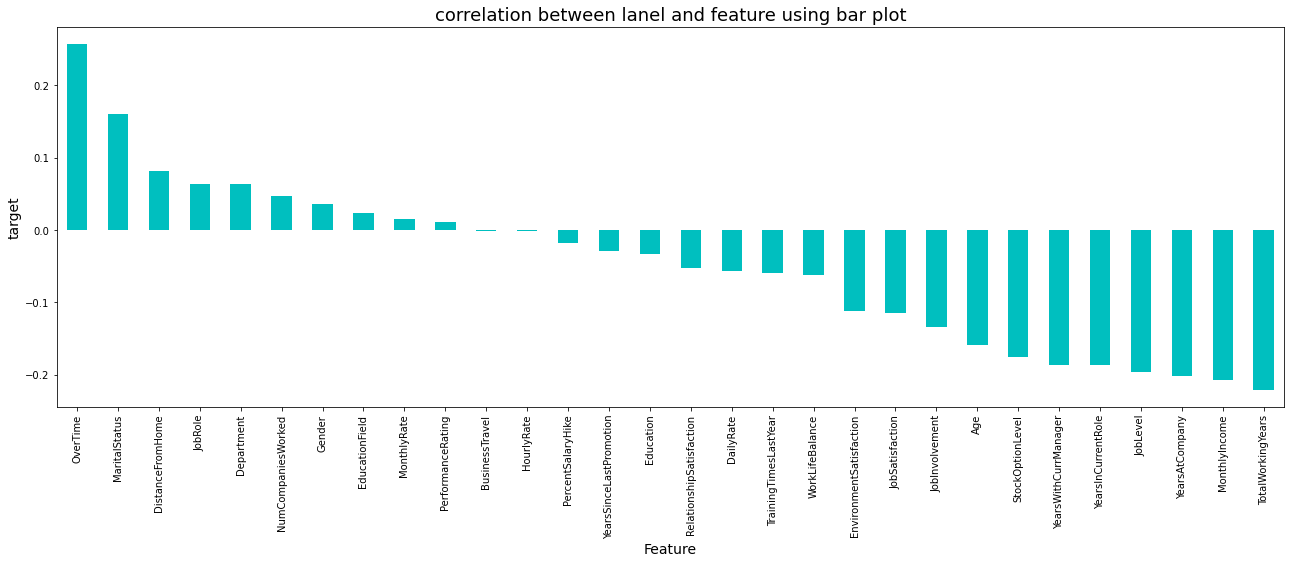

In [76]:
plt.figure(figsize=(22,7))
new_df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

### Dropping irrelevant columns

In [77]:
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,-1.489968,2,1,2,0,...,3,1,-1.084263,-0.173231,-2.608524,1,0.231837,0.290524,0,0.582177
1,49,0,1,279,1,0.244561,1,1,3,1,...,4,4,0.548653,0.147620,0.217074,3,0.948319,1.006575,1,1.018073
2,37,1,2,1373,1,-1.028366,2,4,4,1,...,3,2,-1.084263,-0.351153,0.217074,3,-2.156089,-1.571814,0,-1.528426
3,33,0,1,1392,1,-0.698191,4,1,4,0,...,3,3,-1.084263,-0.173231,0.217074,3,0.621429,1.006575,3,-1.528426
4,27,0,2,591,1,-1.028366,1,3,1,1,...,3,4,0.548653,-0.544046,0.217074,3,-0.933983,-0.390769,2,-0.347871


### Separating the features and label variables into x and y

In [78]:
x = new_df.drop("Attrition", axis=1)
y = new_df["Attrition"]

In [79]:
# Dimension of x
x.shape

(1387, 30)

In [80]:
# Dimension of y
y.shape

(1387,)

In [81]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,-1.489968,2,1,2,0,94,...,3,1,-1.084263,-0.173231,-2.608524,1,0.231837,0.290524,0,0.582177
1,49,1,279,1,0.244561,1,1,3,1,61,...,4,4,0.548653,0.147620,0.217074,3,0.948319,1.006575,1,1.018073
2,37,2,1373,1,-1.028366,2,4,4,1,92,...,3,2,-1.084263,-0.351153,0.217074,3,-2.156089,-1.571814,0,-1.528426
3,33,1,1392,1,-0.698191,4,1,4,0,56,...,3,3,-1.084263,-0.173231,0.217074,3,0.621429,1.006575,3,-1.528426
4,27,2,591,1,-1.028366,1,3,1,1,40,...,3,4,0.548653,-0.544046,0.217074,3,-0.933983,-0.390769,2,-0.347871


In [82]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

## Oversampling

In [83]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [84]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

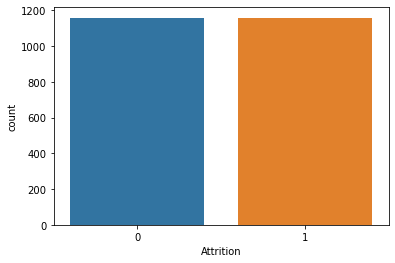

In [85]:
# Visualize the data after balancing
sns.countplot(y)

### Feature Scaling using Standard Scalarization

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.742251,0.778665,0.832876,1.604485,-1.631263,-0.751462,-0.919670,-0.447006,-1.047772,1.504522,...,-0.338428,-1.428829,-0.985045,0.022627,-2.640063,-2.131585,0.427624,0.476041,-0.688238,0.775294
1,1.678937,-0.754829,-1.288133,-0.330925,0.202777,-1.781886,-0.919670,0.490735,0.954406,-0.241286,...,2.954842,1.429652,0.743696,0.354772,0.273995,0.549974,1.177714,1.234448,-0.255097,1.231829
2,0.273908,0.778665,1.531288,-0.330925,-1.143179,-0.751462,1.461943,1.428475,0.954406,1.398716,...,-0.338428,-0.476002,-0.985045,-0.161558,0.273995,0.549974,-2.072312,-1.496459,-0.688238,-1.435239
3,-0.194435,-0.754829,1.580254,-0.330925,-0.794061,1.309386,-0.919670,1.428475,-1.047772,-0.505802,...,-0.338428,0.476825,-0.985045,0.022627,0.273995,0.549974,0.835491,1.234448,0.611185,-1.435239
4,-0.896950,0.778665,-0.484057,-0.330925,-1.143179,-1.781886,0.668072,-1.384747,0.954406,-1.352254,...,-0.338428,1.429652,0.743696,-0.361240,0.273995,0.549974,-0.792880,-0.245553,0.178044,-0.198788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,-0.896950,0.778665,-0.411896,1.604485,0.209467,-0.751462,-0.919670,-1.384747,-1.047772,0.076134,...,-0.338428,-1.428829,-0.142385,-0.824259,-0.126683,0.549974,-0.792880,-0.245553,0.178044,-0.832541
2312,0.976422,0.778665,-0.450554,1.604485,-0.250701,-0.751462,0.668072,0.490735,0.954406,-0.981931,...,-0.338428,0.476825,-0.985045,0.869350,0.273995,-0.790805,1.346750,1.733382,1.910609,-0.721230
2313,-1.599464,-0.754829,-0.012435,-0.330925,0.296187,0.278962,-0.125799,0.490735,-1.047772,-0.770318,...,-0.338428,-1.428829,-0.642034,-1.187669,0.162670,0.549974,-0.598616,-0.045114,-0.688238,-0.005038
2314,-1.131121,-0.754829,0.425683,-0.330925,-0.231961,-1.781886,0.668072,0.490735,-1.047772,1.187103,...,-0.338428,-1.428829,0.515709,-0.056882,-0.548006,0.549974,0.750147,1.134429,-0.255097,1.043159


### Checking VIF values

In [87]:
#Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.962023,Age
1,1.040382,BusinessTravel
2,1.056585,DailyRate
3,2.011904,Department
4,1.035810,DistanceFromHome
5,1.080877,Education
6,1.050480,EducationField
7,1.070744,EnvironmentSatisfaction
8,1.048809,Gender
9,1.023195,HourlyRate


In [88]:
# DataFrame after preprocessing and data cleaning
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,-1.489968,2,1,2,0,...,3,1,-1.084263,-0.173231,-2.608524,1,0.231837,0.290524,0,0.582177
1,49,0,1,279,1,0.244561,1,1,3,1,...,4,4,0.548653,0.147620,0.217074,3,0.948319,1.006575,1,1.018073
2,37,1,2,1373,1,-1.028366,2,4,4,1,...,3,2,-1.084263,-0.351153,0.217074,3,-2.156089,-1.571814,0,-1.528426
3,33,0,1,1392,1,-0.698191,4,1,4,0,...,3,3,-1.084263,-0.173231,0.217074,3,0.621429,1.006575,3,-1.528426
4,27,0,2,591,1,-1.028366,1,3,1,1,...,3,4,0.548653,-0.544046,0.217074,3,-0.933983,-0.390769,2,-0.347871


# Modeling

### Finding best random state

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8647482014388489  on Random_state  8


#### Creating train_test split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=194)

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

## Decision Tree Classifier

In [92]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8359712230215828
[[280  50]
 [ 64 301]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       330
           1       0.86      0.82      0.84       365

    accuracy                           0.84       695
   macro avg       0.84      0.84      0.84       695
weighted avg       0.84      0.84      0.84       695



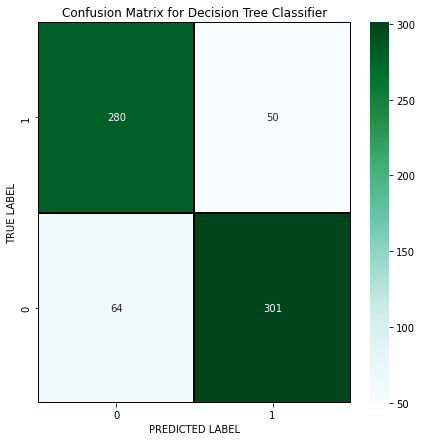

In [93]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Random Forest Classifier

In [94]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.902158273381295
[[315  15]
 [ 53 312]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       330
           1       0.95      0.85      0.90       365

    accuracy                           0.90       695
   macro avg       0.91      0.90      0.90       695
weighted avg       0.91      0.90      0.90       695



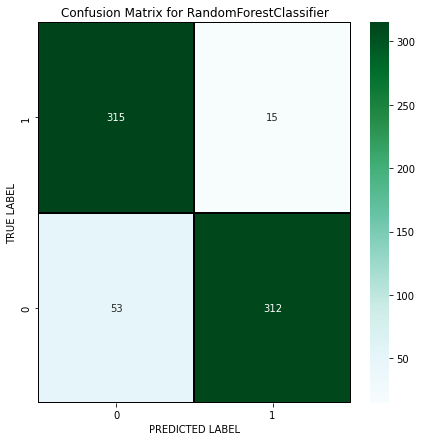

In [95]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### Logistic Regression

In [96]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8316546762589928
[[280  50]
 [ 67 298]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       330
           1       0.86      0.82      0.84       365

    accuracy                           0.83       695
   macro avg       0.83      0.83      0.83       695
weighted avg       0.83      0.83      0.83       695



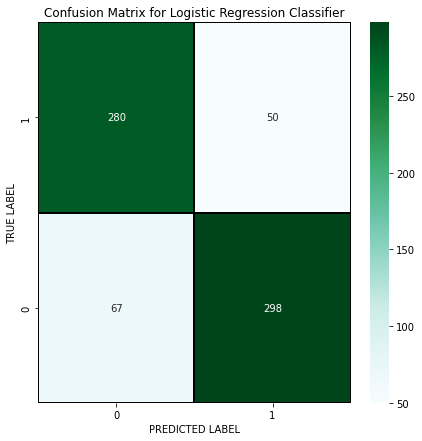

In [97]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

### Support Vector Machine Classifier

In [98]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.9064748201438849
[[300  30]
 [ 35 330]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       330
           1       0.92      0.90      0.91       365

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695



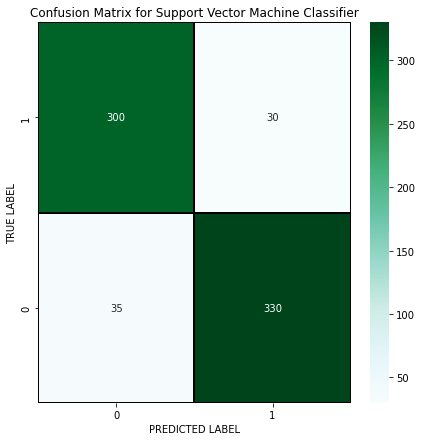

In [99]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### KNeighbors Classifier

In [100]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8201438848920863
[[215 115]
 [ 10 355]]
              precision    recall  f1-score   support

           0       0.96      0.65      0.77       330
           1       0.76      0.97      0.85       365

    accuracy                           0.82       695
   macro avg       0.86      0.81      0.81       695
weighted avg       0.85      0.82      0.81       695



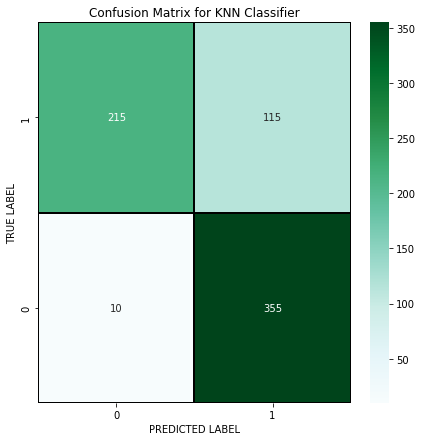

In [101]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### Gradient Boosting Classifier

In [102]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.9035971223021583
[[310  20]
 [ 47 318]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       330
           1       0.94      0.87      0.90       365

    accuracy                           0.90       695
   macro avg       0.90      0.91      0.90       695
weighted avg       0.91      0.90      0.90       695



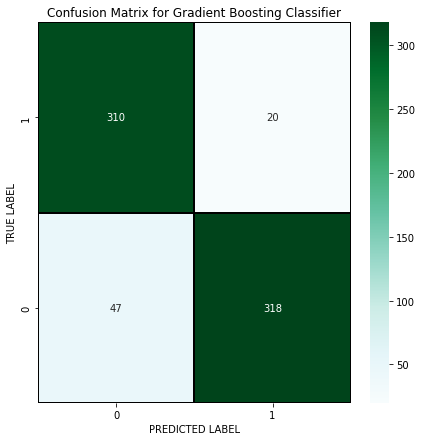

In [103]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

### AdaBoost Classifier

In [104]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.8906474820143885
[[292  38]
 [ 38 327]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       330
           1       0.90      0.90      0.90       365

    accuracy                           0.89       695
   macro avg       0.89      0.89      0.89       695
weighted avg       0.89      0.89      0.89       695



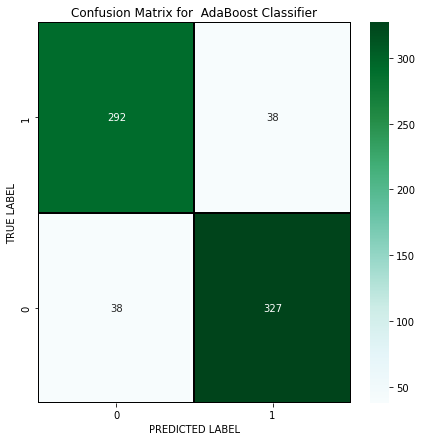

In [105]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

## Checking the Cross Validation Score

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.8312560512400389
0.8939012810009682
0.803602815223058
0.8671008043494453
0.8277314366574812
0.8757857302450287
0.848998287033589


From the difference of both accuracy score and Cross Validation score we can conclude that Kneighbors as our best fitting model.

## Hyperparameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
 # KNN classifier
parameters = {'n_neighbors':[2,3,4,5,6],
              'weights':['uniform','distance'],
              'leaf_size':[10,100],
              'algorithm':['auto','ball_tree','kd_tree','brute']}

In [110]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [111]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100], 'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [112]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'uniform'}

In [113]:
Attrition = KNN(algorithm='auto', leaf_size=10, n_neighbors=2, weights='uniform')
Attrition.fit(x_train, y_train)
pred = Attrition.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.05035971223022


The accuracy of the best model increased after tuning and giving 91% accuracy.

### Plotting ROC and compare AUC for all the models used

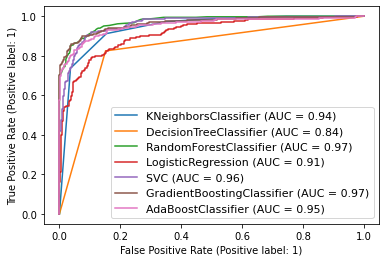

In [114]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

This is the AUC-ROC curve for the models taht we have used and is plotted False positive rate against True positive rate.

### Saving the model

In [115]:
# Saving the model using .pkl
import joblib
joblib.dump(Attrition,"HR analytics_Understanding_the_Attrtion_in_HR.pkl")

['HR analytics_Understanding_the_Attrtion_in_HR.pkl']